<a href="https://colab.research.google.com/github/BorisMejiasII/SVM-ML/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

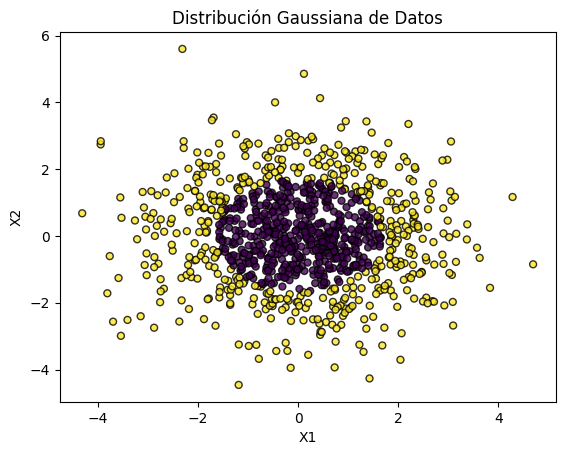

In [1]:
#create two gaussian distributions using make_gaussian_quantiles

from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# plot  data. Seaborn, blue a red color, transparency.

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.title("Distribución Gaussiana de Datos")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# PASO 2: Manipulación de datos


In [2]:
from sklearn.model_selection import train_test_split

# División inicial: 60% entrenamiento, 40% prueba+validación
X_train, X_temp, y_train, y_temp = train_test_split(X1, Y1, test_size=0.4, random_state=42)

# División secundaria: 20% validación, 20% prueba, es decir (40% prueba+validación)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Tamaño entrenamiento: {len(X_train)}")
print(f"Tamaño validación: {len(X_val)}")
print(f"Tamaño prueba: {len(X_test)}")


Tamaño entrenamiento: 600
Tamaño validación: 200
Tamaño prueba: 200


#PASO 3: Exploración de Datos

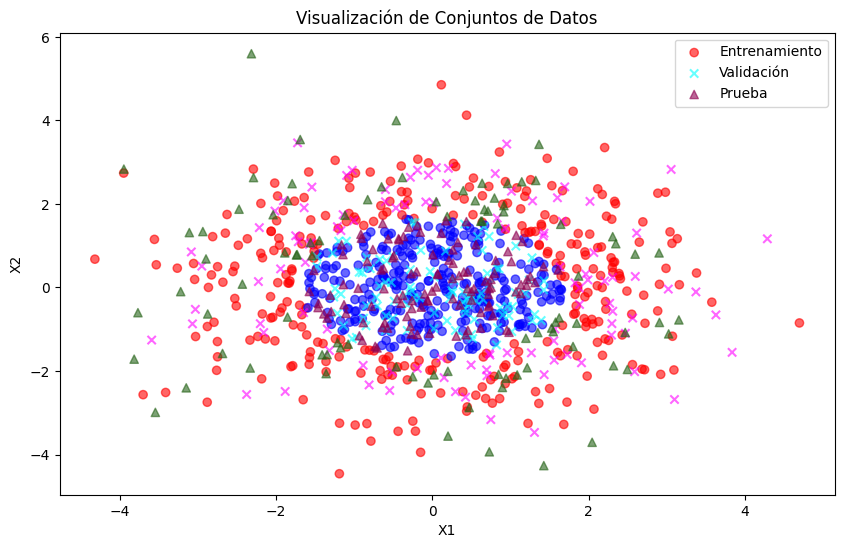

In [3]:
def plot_data_sets(X_train, y_train, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(10, 6))

     # Graficamos los tres subconjuntos con diferentes colores y marcadores para poder diferenciarlos a simple vista
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', label='Entrenamiento', alpha=0.6)
    plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='cool', label='Validación', alpha=0.6, marker='x')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='PiYG', label='Prueba', alpha=0.6, marker='^')

    # Títulos y leyendas para que se pueda comprender de mejor forma del gráfico
    plt.title("Visualización de Conjuntos de Datos")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

plot_data_sets(X_train, y_train, X_val, y_val, X_test, y_test)


# PASO 4: Modelamiento de Datos (Machine Learning)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Crear el modelo SVM con kernel Gaussiano (RBF)
clf = SVC(kernel='rbf', gamma='scale', C=1.0)
clf.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluación
print("Reporte de Clasificación en Prueba:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación en Prueba:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       110
           1       0.96      0.96      0.96        90

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



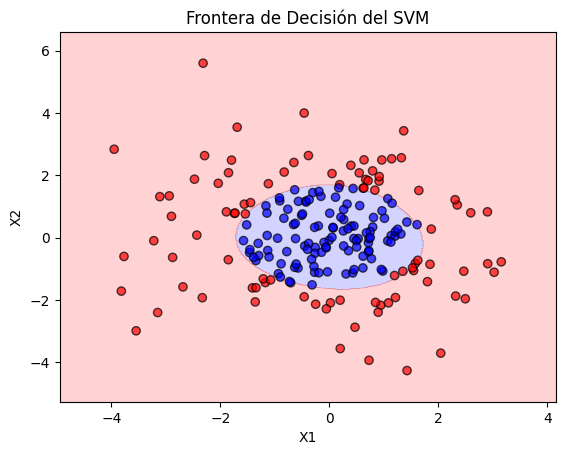

In [7]:
import numpy as np

def plot_decision_boundary(clf, X, y):
    h = 0.02
    # Creamos una malla de puntos (rejilla) sobre el espacio de características
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujamos la "frontera" como un mapa de colores (pa que se pueda visualizar) y los datos reales sobrepuestos
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
    plt.title("Frontera de Decisión del SVM")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(clf, X_test, y_test)


#PASO 5: Interpretación de los Resultados

In [6]:
# Probar con diferentes combinaciones
params = [(0.1, 0.1), (1, 0.1), (10, 1)]

for C_val, gamma_val in params:
    model = SVC(kernel='rbf', C=C_val, gamma=gamma_val)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f"Parámetros: C={C_val}, gamma={gamma_val}")
    print(classification_report(y_val, y_pred))
    print("-" * 40)


Parámetros: C=0.1, gamma=0.1
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        96
           1       1.00      0.92      0.96       104

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

----------------------------------------
Parámetros: C=1, gamma=0.1
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        96
           1       1.00      0.98      0.99       104

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

----------------------------------------
Parámetros: C=10, gamma=1
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.99      1.00       104

    accuracy      

**Análisis final**

De los tres ajustes probados, el par C=0.1, γ=0.1 obtuvo un accuracy de 96 % con buen recall en la clase 0 (1.00) pero precision algo menor (0.92), indicando un modelo demasiado suave; tanto C=1, γ=0.1 como C=10, γ=1 alcanzaron 99 % de accuracy con precision y recall ≥0.98 en ambas clases, aunque el segundo corre mayor riesgo de sobreajuste por sus valores altos de C y γ, de modo que el ajuste óptimo que equilibra flexibilidad y generalización es C=1, γ=0.1, pues ofrece un excelente balance entre precisión y robustez sin sobreajustar.